<a href="https://colab.research.google.com/github/noelsj11/Kaiburr_5/blob/main/KaiburrAssignment5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
url = "https://files.consumerfinance.gov/ccdb/complaints.csv.zip"

# Load only required columns and sample 100k rows
cols = ["Product", "Consumer complaint narrative"]
df = pd.read_csv(url, compression='zip', usecols=cols, nrows=100000)
df = df.dropna(subset=["Consumer complaint narrative"])

print(" Data Loaded Successfully!")
print(df.shape)
df.head()

 Data Loaded Successfully!
(7895, 2)


,Product,Consumer complaint narrative
7,"Credit reporting, credit repair services, or o...",These are not my accounts.
15,Credit reporting or other personal consumer re...,Kindly address this issue on my credit report....
22,Credit reporting or other personal consumer re...,There are XXXX collections being reported to t...
44,Credit reporting or other personal consumer re...,"Violation of Gramm-Leach-Bliley Act ( GLBA ), ..."
68,Credit reporting or other personal consumer re...,"Good day, filing this complaint to follow up m..."


In [ ]:
mapping = {
    "Credit reporting, credit repair services, or other personal consumer reports": 0,
    "Debt collection": 1,
    "Consumer Loan": 2,
    "Mortgage": 3
}
df["Category"] = df["Product"].map(mapping)
df = df.dropna(subset=["Category"])

print("Category Counts:")
print(df["Category"].value_counts())


Category Counts:
Category
0.0    1101
1.0     857
3.0     240
2.0      18
Name: count, dtype: int64


In [ ]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    words = text.split()
    words = [lemmatizer.lemmatize(w) for w in words if w not in stop_words]
    return ' '.join(words)

df["clean_text"] = df["Consumer complaint narrative"].apply(clean_text)
print("Text Cleaning Done")
df.head()

Text Cleaning Done


,Product,Consumer complaint narrative,Category,clean_text
7,"Credit reporting, credit repair services, or o...",These are not my accounts.,0.0,account
126,"Credit reporting, credit repair services, or o...","I wrote three requests, the unverified account...",0.0,wrote three request unverified account listed ...
178,"Credit reporting, credit repair services, or o...",I've found that my credit report has erroneous...,0.0,found credit report erroneous information mult...
209,Debt collection,RE : Attentively review my formal writ compose...,1.0,attentively review formal writ composed declar...
221,"Credit reporting, credit repair services, or o...",I have filed a dispute in regards to the incor...,0.0,filed dispute regard incorrect information cre...


In [ ]:
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df["clean_text"]).toarray()
y = df["Category"]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [ ]:
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

Accuracy: 0.8423423423423423

Classification Report:
               precision    recall  f1-score   support

         0.0       0.83      0.92      0.87       220
         1.0       0.85      0.80      0.82       172
         2.0       0.00      0.00      0.00         4
         3.0       0.85      0.73      0.79        48

    accuracy                           0.84       444
   macro avg       0.63      0.61      0.62       444
weighted avg       0.84      0.84      0.84       444



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


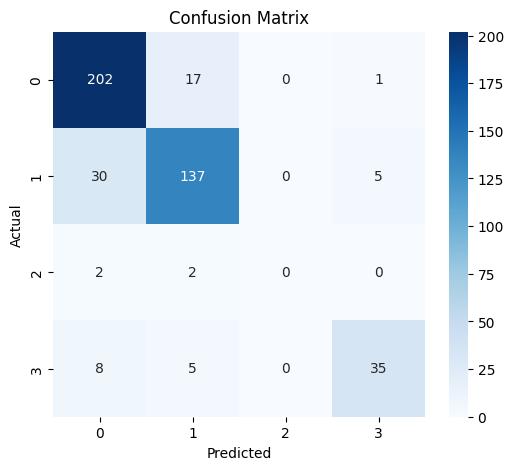

In [ ]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
category_map = {
    0: "Credit reporting, repair, or other",
    1: "Debt collection",
    2: "Consumer Loan",
    3: "Mortgage"
}

def predict_category(text):
    # Clean the text same as training
    text_clean = clean_text(text)
    # Transform with TF-IDF
    text_vec = vectorizer.transform([text_clean])
    # Predict
    pred = model.predict(text_vec)[0]
    # Return category name
    return category_map[pred]

# Interactive loop
print("\n You can now enter a complaint and see its predicted category.")
print("Type 'exit' to quit.")
while True:
    sample_text = input("\nEnter a consumer complaint: ")
    if sample_text.lower() == "exit":
        break
    category = predict_category(sample_text)
    print(f"Predicted Category: {category}")


 You can now enter a complaint and see its predicted category.
Type 'exit' to quit.
Predicted Category: Credit reporting, repair, or other
